# Use machine learning approach to identify the quality of the wine

* 1 - fixed acidity 
* 2 - volatile acidity 
* 3 - citric acid 
* 4 - residual sugar 
* 5 - chlorides 
* 6 - free sulfur dioxide 
* 7 - total sulfur dioxide 
* 8 - density 
* 9 - pH 
* 10 - sulphates 
* 11 - alcohol Output variable
* 12 - quality (score between 0 and 10) -   **1(good) if quality is more than 5 else 0(not good)** 

In [1]:
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data = pd.read_csv('wine_data.csv', sep=',')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.duplicated().sum()
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

Feature:  fixed acidity


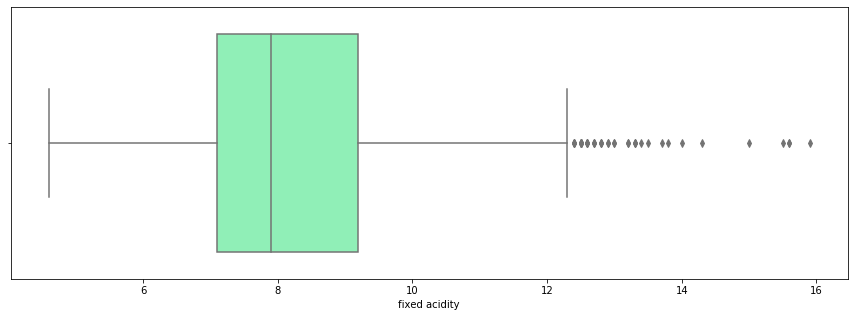

Feature:  volatile acidity


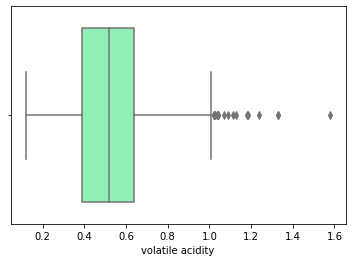

Feature:  citric acid


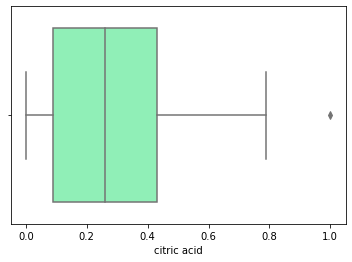

Feature:  residual sugar


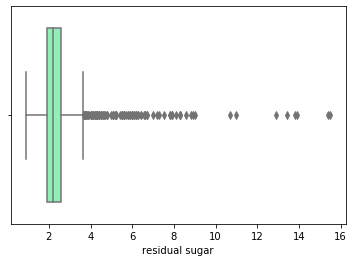

Feature:  chlorides


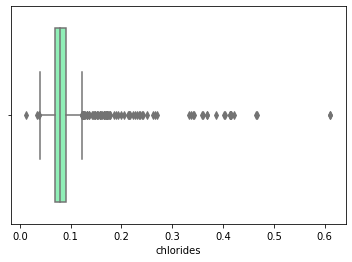

Feature:  free sulfur dioxide


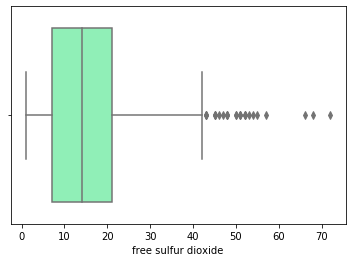

Feature:  total sulfur dioxide


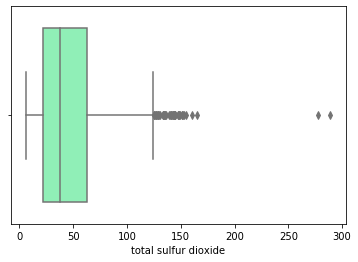

Feature:  density


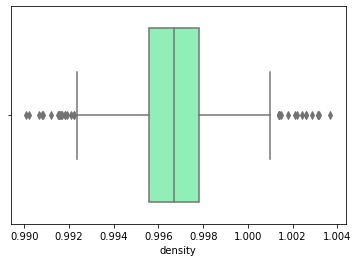

Feature:  pH


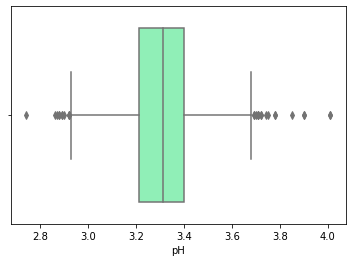

Feature:  sulphates


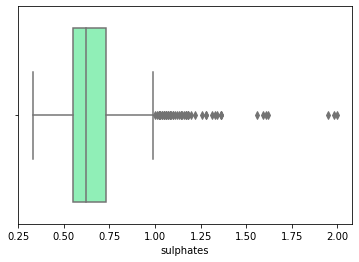

Feature:  alcohol


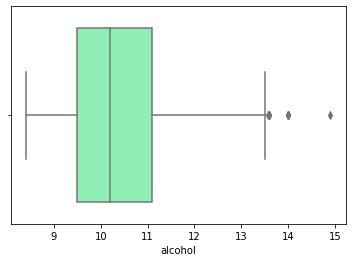

Feature:  quality


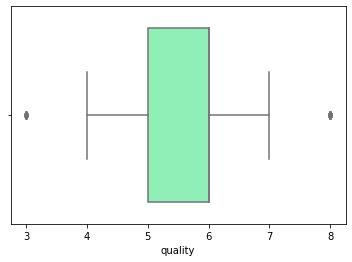

In [4]:
fig = plt.figure(figsize = (15,5))

for i in data.columns:
    sns.boxplot(x = data[i], data= data, palette='rainbow', orient='h', )
    print('Feature: ', i)
    plt.show()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [6]:
data.quality.value_counts()
# data.quality.unique()

# quality > 5 - 1 -- good
# quality < 5 - 0 -- bad

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [7]:
data.quality.value_counts()


5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [8]:
# Making Binary Class from given range of values

data['grade'] = data['quality'].apply(lambda x: 'poor' if x<= 5 else 'good' )

In [9]:
data.grade.value_counts()


good    719
poor    640
Name: grade, dtype: int64

In [10]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,poor
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,poor
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,poor
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,poor


In [11]:
data.grade.value_counts()

good    719
poor    640
Name: grade, dtype: int64

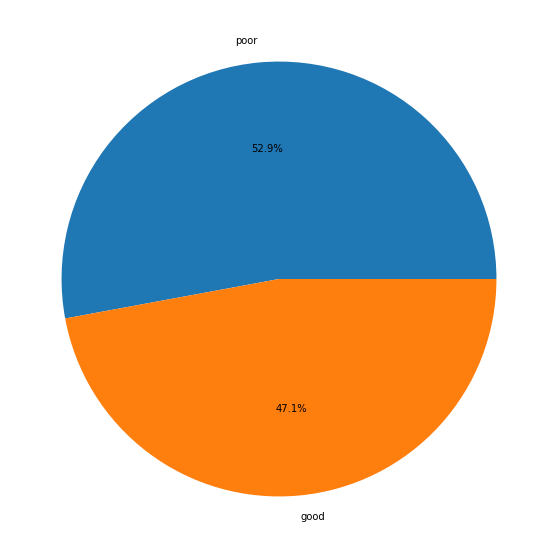

In [12]:
fig = plt.figure(figsize = (10,10))

plt.pie(data.grade.value_counts(), 
        autopct='%1.1f%%',
        labels=['poor','good']);

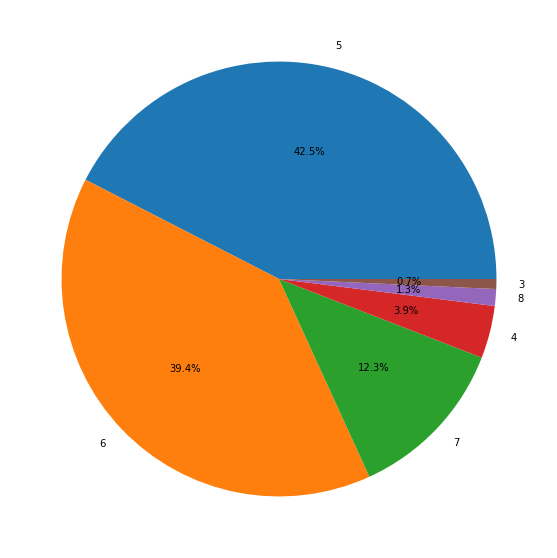

In [13]:
fig = plt.figure(figsize = (10,10))

plt.pie(data.quality.value_counts(), 
        autopct='%1.1f%%',
        labels=data.quality.unique());

In [14]:
data.shape

(1359, 13)

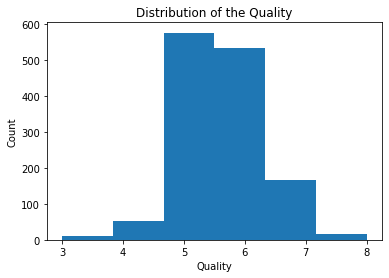

In [15]:
plt.hist(data.quality,bins=6,histtype='bar')

plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


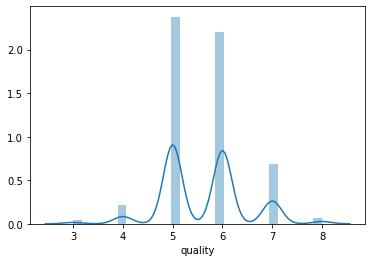

In [16]:
sns.distplot(data['quality'])

In [17]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,poor
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,poor
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,poor
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,poor


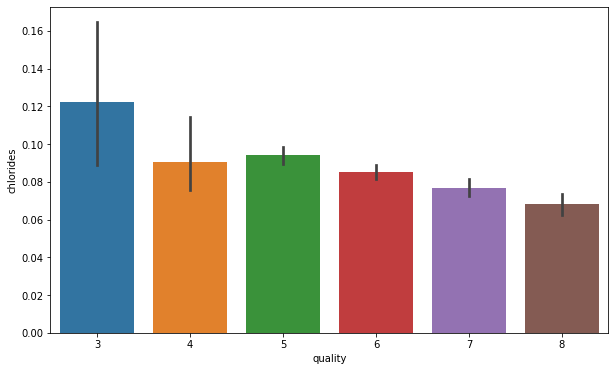

In [18]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = data)

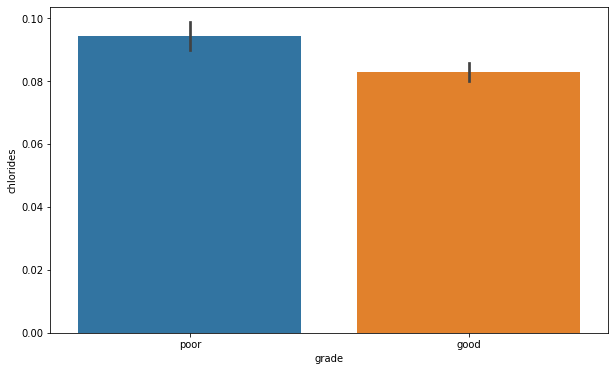

In [19]:
fig = plt.figure(figsize = (10,6))

sns.barplot(x = 'grade', y = 'chlorides', data = data)

In [20]:
len(data.iloc[:,:-1].columns)

12

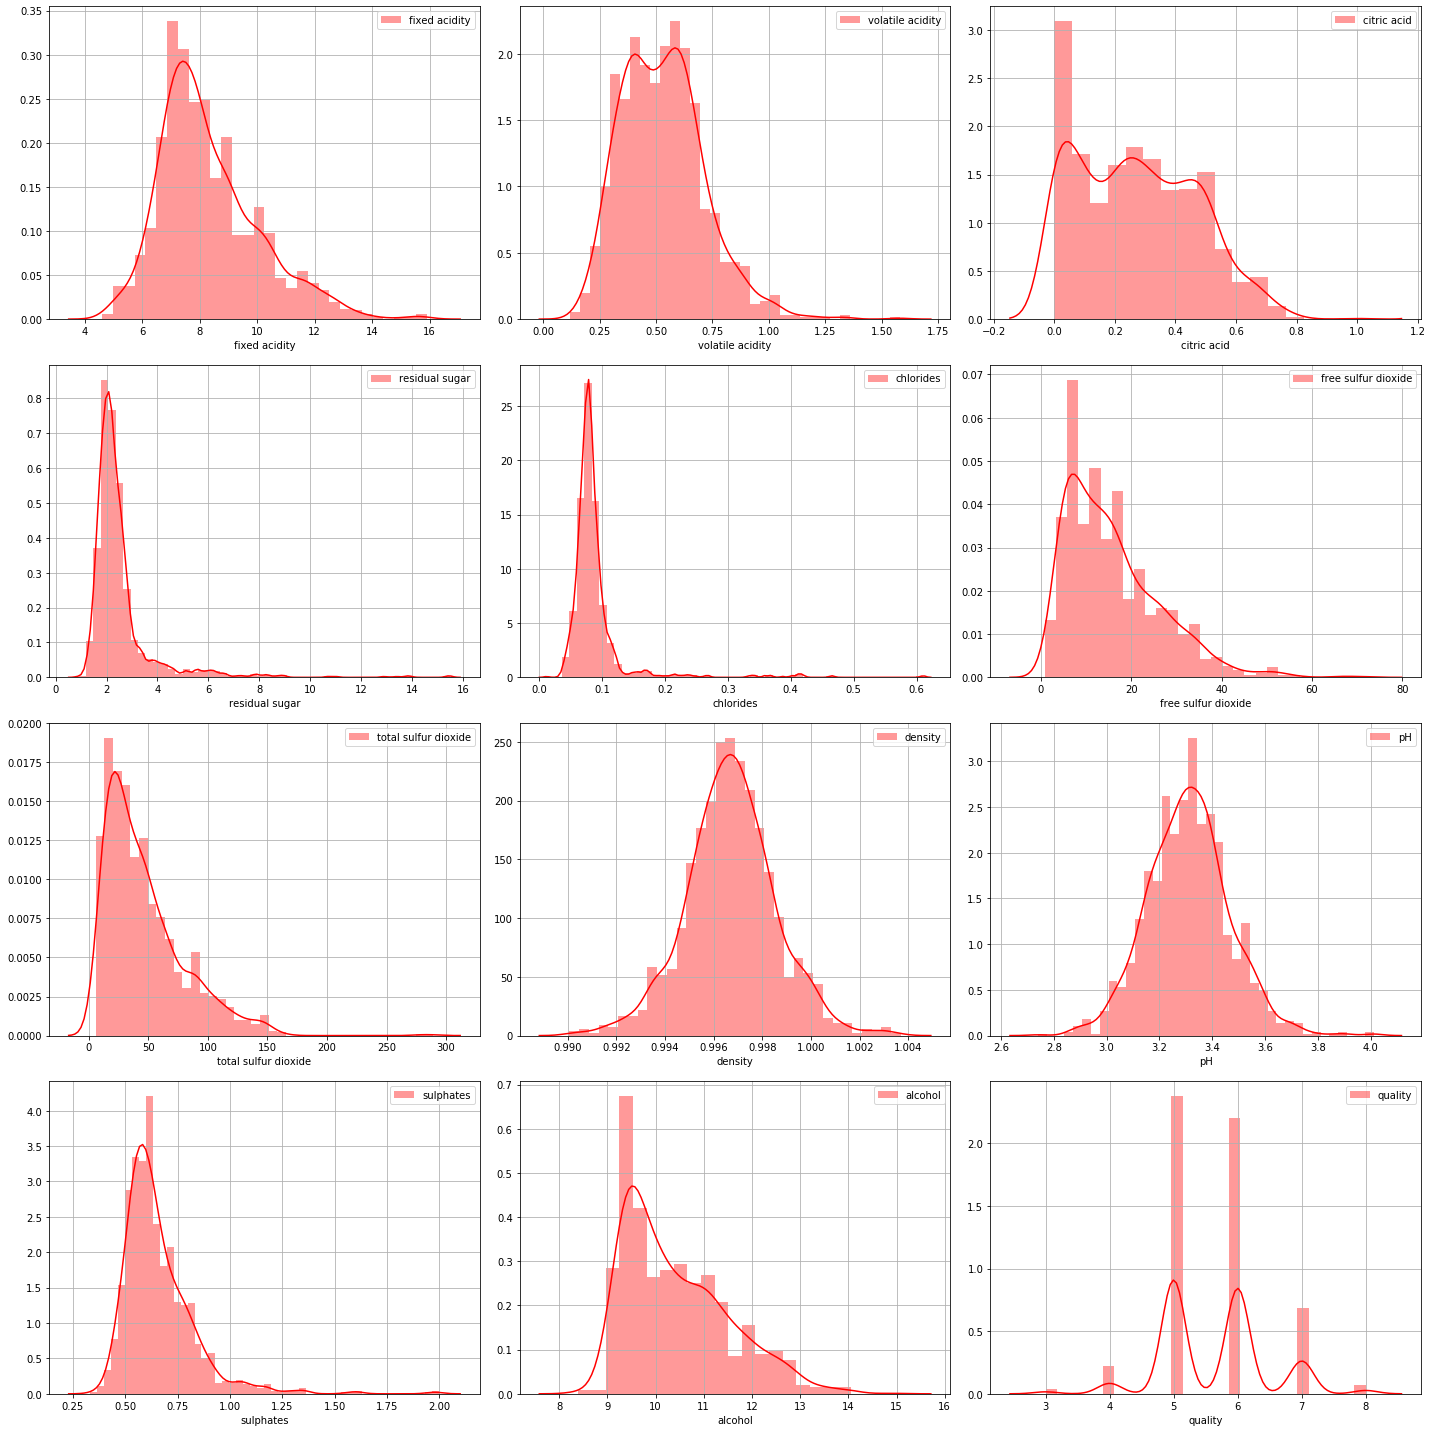

In [21]:
plt.figure(figsize = (20,20))

for i, col in enumerate(list(data.iloc[:,:-1].columns.values)):
    plt.subplot(4,3,i+1)
    sns.distplot(data[col], color = 'r', kde = True, label = col)
    plt.grid()
    plt.legend(loc = 'upper right')
    plt.tight_layout()

In [22]:
data.grade.value_counts()

good    719
poor    640
Name: grade, dtype: int64

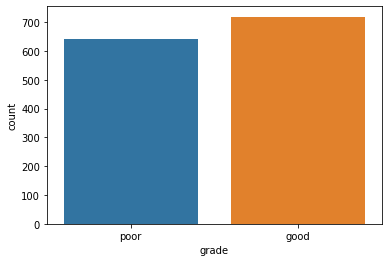

In [23]:
sns.countplot(data['grade'])

In [24]:
data.groupby('quality')['alcohol','total sulfur dioxide', 'chlorides'].min()

,alcohol,total sulfur dioxide,chlorides
quality,,,
3,8.4,9.0,0.061
4,9.0,7.0,0.045
5,8.5,6.0,0.039
6,8.4,6.0,0.034
7,9.2,7.0,0.012
8,9.8,12.0,0.044


In [25]:
data.groupby('quality')['alcohol','total sulfur dioxide'].agg(['min','max','mean'])

alcohol                  total sulfur dioxide                  
            min   max       mean                  min    max       mean
quality                                                                
3           8.4  11.0   9.955000                  9.0   49.0  24.900000
4           9.0  13.1  10.265094                  7.0  119.0  36.245283
5           8.5  14.9   9.888562                  6.0  155.0  57.406412
6           8.4  14.0  10.658879                  6.0  165.0  40.816822
7           9.2  14.0  11.491118                  7.0  289.0  35.449102
8           9.8  14.0  12.158824                 12.0   88.0  34.470588

In [26]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


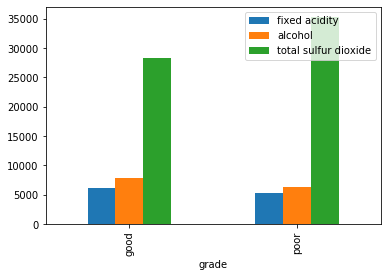

In [27]:
data.groupby('grade')['fixed acidity','alcohol','total sulfur dioxide'].agg('sum').plot(kind = 'bar')

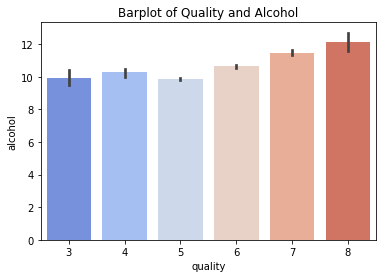

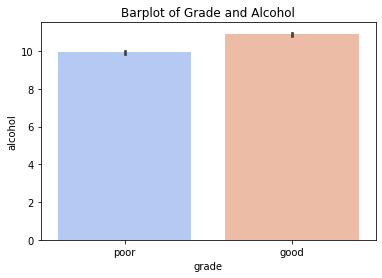

In [28]:
sns.barplot(data.quality, data.alcohol, data=data, palette='coolwarm')
plt.title("Barplot of Quality and Alcohol")
plt.show()

sns.barplot(data.grade, data.alcohol, data=data, palette='coolwarm')
plt.title("Barplot of Grade and Alcohol")
plt.show()

In [29]:
# sns.pairplot(data, hue='grade',palette = 'gist_ncar',diag_kind='bar')

# date -  time, month, day, day of week

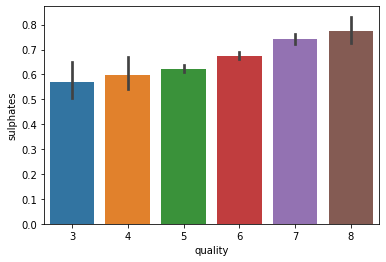

In [30]:
#Sulphates level goes higher with the quality of wine
sns.barplot(x = 'quality', y = 'sulphates', data = data)

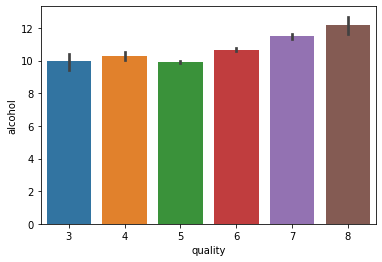

In [31]:
#Alcohol level also goes higher as te quality of wine increases

sns.barplot(x = 'quality', y = 'alcohol', data = data)

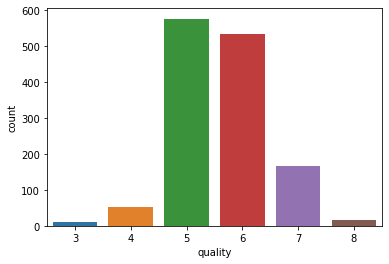

In [32]:
sns.countplot(data['quality'])

# univariate analysis ---> single feature
# bivariate analysis ---> dual features
# multivariate analyis ---> multiple features

In [33]:
# sns.pairplot(data)

In [34]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,poor
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,poor
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,poor
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,poor


In [35]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn import metrics

from sklearn.model_selection import GridSearchCV


# Normailization --  KNN, SVM , DT, RF
# Ensemble

In [36]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,poor
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,poor
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,poor
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,poor


In [37]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


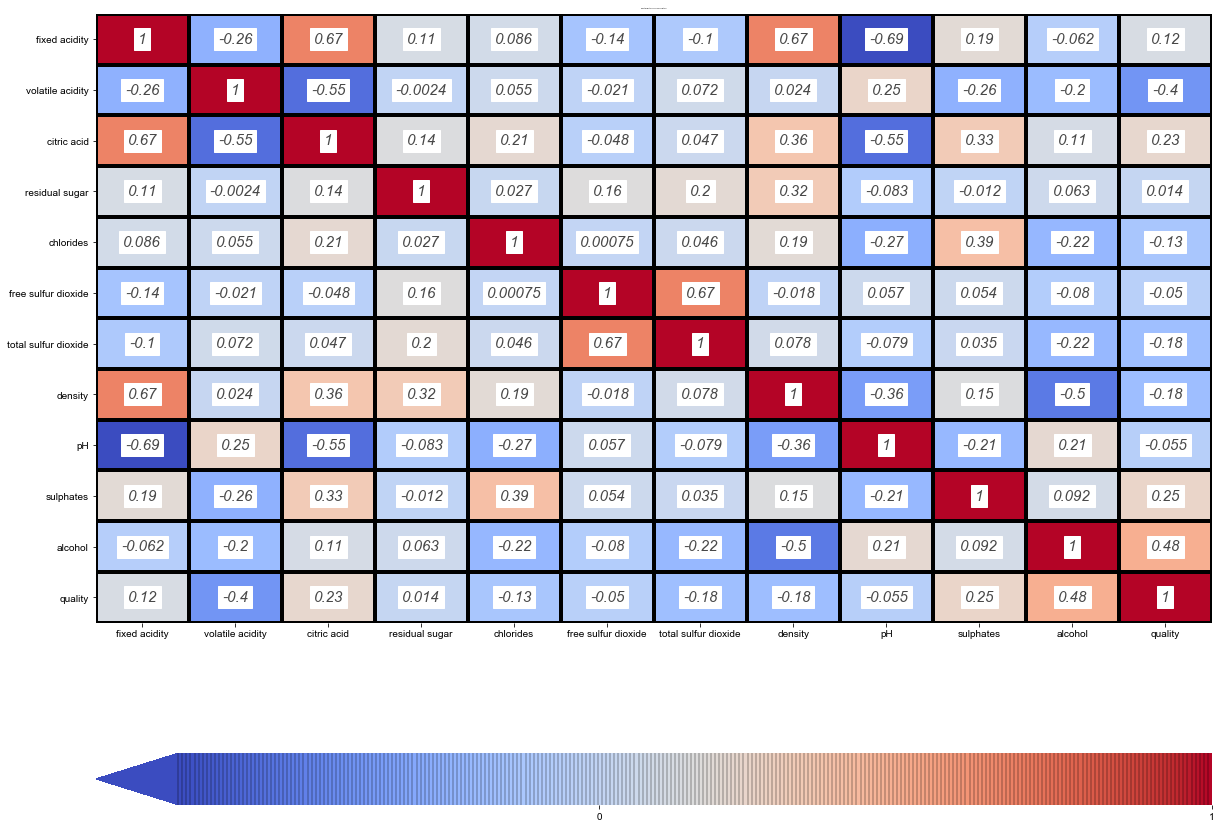

In [38]:
plt.figure(figsize=(20,16))
annot_kws={'fontsize': 15,'fontstyle':'italic','color':'k', 'alpha': 0.8, 
           'backgroundcolor':'w', 'verticalalignment':'center', 'rotation':'horizontal'}
                                                        
cbar_kws={'orientation':'horizontal',
         'shrink':1,
         'extend':'min',
         'extendfrac':0.08,
         'ticks':np.arange(0,22),
         'drawedges':True}

sns.heatmap(data.corr(), cmap='coolwarm',  annot=True, annot_kws=annot_kws, cbar_kws=cbar_kws, linewidth=3,  linecolor='k') 
plt.title('heatmap to check correlation', fontsize=2)

sns.set(font_scale= 1.4)

In [39]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [40]:
data.groupby('grade').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
grade,,,,,,,,,,,,
good,8.460918,0.472997,0.303296,2.520376,0.082765,15.211405,39.420028,0.996411,3.310473,0.692726,10.887645,6.279555
poor,8.141719,0.592930,0.237547,2.526797,0.094144,16.659375,55.146094,0.997044,3.309016,0.620484,9.920781,4.885937


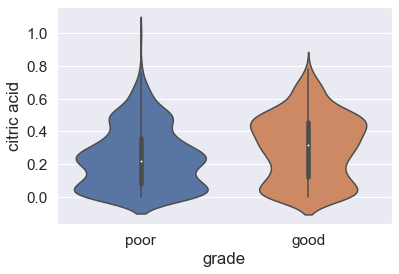

In [41]:
sns.violinplot(x="grade", y='citric acid', data = data)

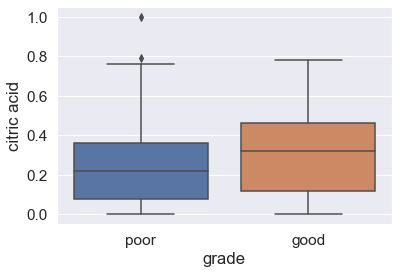

In [42]:
sns.boxplot(x="grade", y='citric acid', data = data)

In [43]:
'''for col in df.columns:
    if df[col].dtype == int or df[col].dtype == float:
        q1, q3 = np.percentile(df[col], [25,75])
        iqr = q3-q1
        lower_fence = q1-(1.5 * iqr)
        upper_fence = q3-(1.5 * iqr)
    
        print("feature: ", col, '\nq1:', q1,'\nq3: ', q3, '\niqr: ', iqr, '\nlower_fence: ', lower_fence, '\nupper_fence: ', upper_fence, '\n'*2)'''''

'for col in df.columns:\n    if df[col].dtype == int or df[col].dtype == float:\n        q1, q3 = np.percentile(df[col], [25,75])\n        iqr = q3-q1\n        lower_fence = q1-(1.5 * iqr)\n        upper_fence = q3-(1.5 * iqr)\n    \n        print("feature: ", col, \'\nq1:\', q1,\'\nq3: \', q3, \'\niqr: \', iqr, \'\nlower_fence: \', lower_fence, \'\nupper_fence: \', upper_fence, \'\n\'*2)'

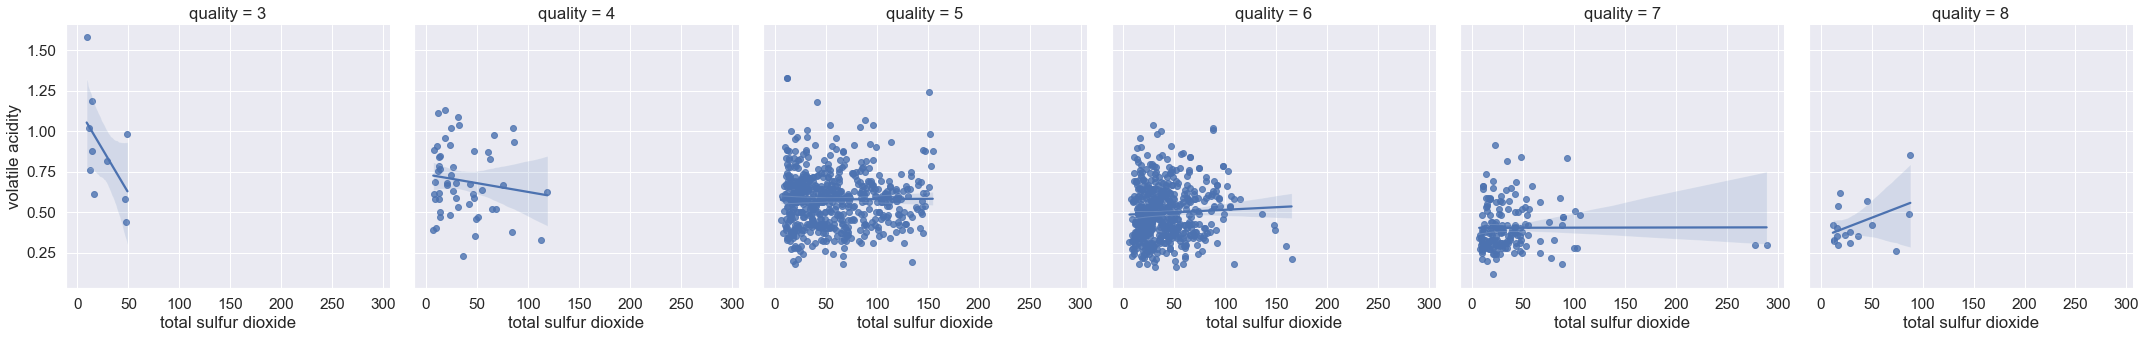

In [44]:
sns.lmplot(x = "total sulfur dioxide", y = "volatile acidity", col = "quality", data = data)

In [45]:
# q11 = data['fixed acidity'].quantile(0.25)
# q22 = data['fixed acidity'].quantile(0.75)
# print(q11, q22)

In [46]:
df1 = data.copy()
df2 = data.copy()

df3 = data.copy()
df4 = data.copy()
df5 = data.copy()
df6 = data.copy()
df7 = data.copy()


Feature:  fixed acidity


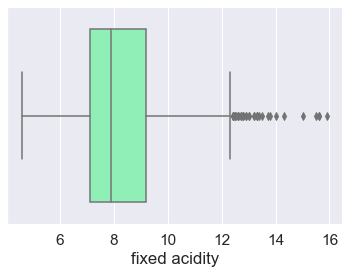

Feature:  volatile acidity


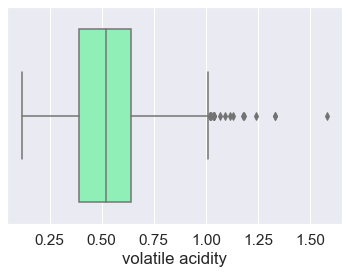

Feature:  citric acid


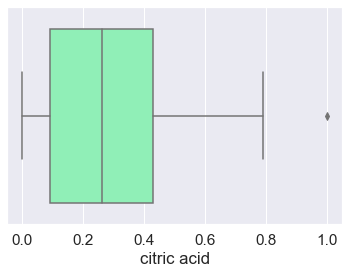

Feature:  residual sugar


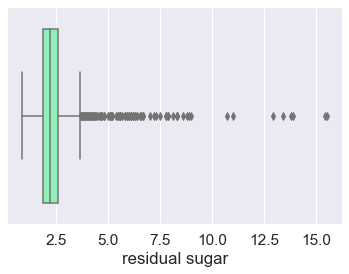

Feature:  chlorides


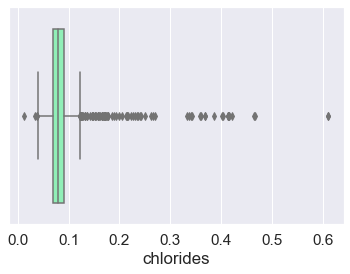

Feature:  free sulfur dioxide


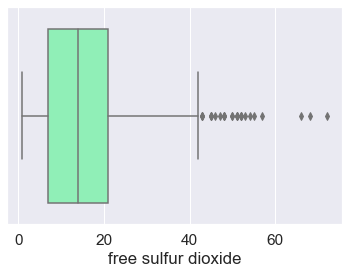

Feature:  total sulfur dioxide


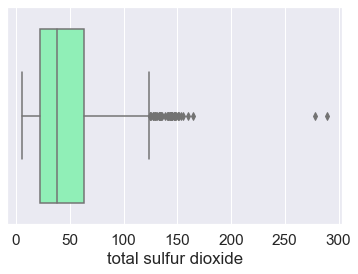

Feature:  density


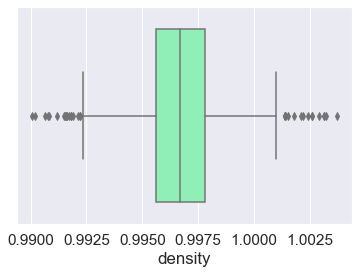

Feature:  pH


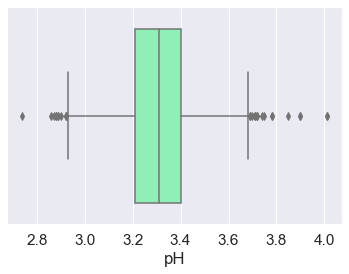

Feature:  sulphates


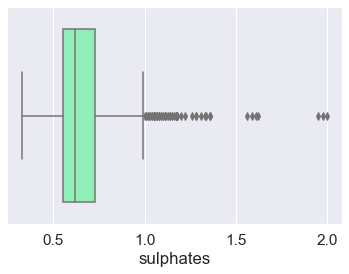

Feature:  alcohol


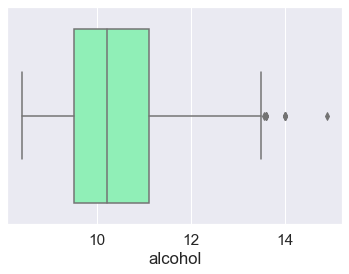

Feature:  quality


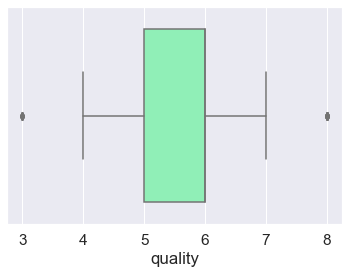

In [47]:
for i in df1.iloc[:,:-1].columns:
    print('Feature: ', i)
    sns.boxplot(x = df1[i], data= df1, palette='rainbow', orient='h', )
    
    plt.show()

In [48]:
# to treat outliers of multiple columns in one go
def outlier1(*column):
    for i in column:
        q1,q3=np.percentile(df1[i],[25,75])
        iqr=q3-q1
        lower_fence=q1-(1.5*iqr)
        upper_fence=q3+(1.5*iqr)
        df1[i].clip(lower_fence,upper_fence,inplace=True) # clip -- only consider the values in given range
        
outlier1('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol')


In [49]:
def outlier_treat(df):
    for i in df.columns: 
        if df[i].dtype == int or df[i].dtype == float:
            q1, q3 = np.percentile(df[i],[25,75]) 
            iqr = q3 - q1 
            lower = q1 - (1.5 * iqr) 
            upper = q3 + (1.5 * iqr) 
            df[i] = df[i].apply(lambda x : lower if x < lower 
                          else upper if x > upper else x)

            
outlier_treat(df2)

In [50]:
def Outlier(data):
    for column in data.columns:
        if data[column].dtype == 'float64':
            Q1 = np.percentile(data[column],25)
            Q3 = np.percentile(data[column],75)
            IQR =  Q3 - Q1
            lower = Q1 - (1.5 * IQR)
            upper = Q3 + (1.5 * IQR) 
            data.loc[:,column] = np.where(data[column].values > upper, upper, data[column].values)
            data.loc[:,column] = np.where(data[column].values < lower, lower, data[column].values)
            if column == 'density':
                print(upper, lower)
    return data

df55 = Outlier(df6.iloc[:,:-2])

1.00115 0.99227


quantiles for i: fixed acidity 
q1:  7.1 
q3:  9.2 
iqr:  2.0999999999999996 
lower_fence:  3.95 
upper_fence:  12.349999999999998


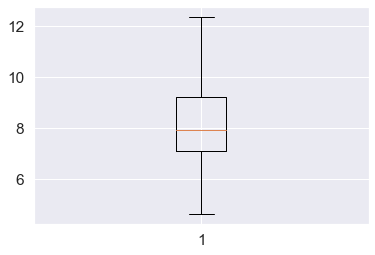

quantiles for i: volatile acidity 
q1:  0.39 
q3:  0.64 
iqr:  0.25 
lower_fence:  0.015000000000000013 
upper_fence:  1.0150000000000001


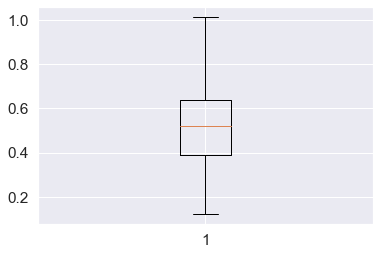

quantiles for i: citric acid 
q1:  0.09 
q3:  0.43 
iqr:  0.33999999999999997 
lower_fence:  -0.42000000000000004 
upper_fence:  0.94


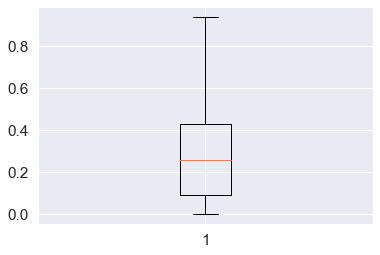

quantiles for i: residual sugar 
q1:  1.9 
q3:  2.6 
iqr:  0.7000000000000002 
lower_fence:  0.8499999999999996 
upper_fence:  3.6500000000000004


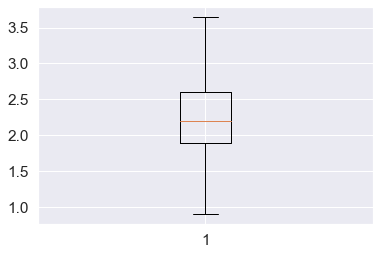

quantiles for i: chlorides 
q1:  0.07 
q3:  0.091 
iqr:  0.02099999999999999 
lower_fence:  0.03850000000000002 
upper_fence:  0.12249999999999998


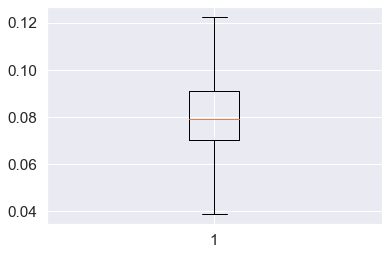

quantiles for i: free sulfur dioxide 
q1:  7.0 
q3:  21.0 
iqr:  14.0 
lower_fence:  -14.0 
upper_fence:  42.0


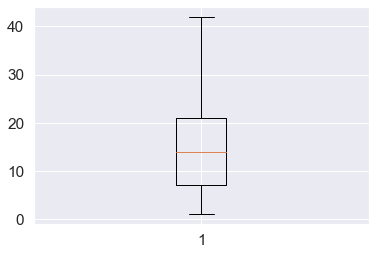

quantiles for i: total sulfur dioxide 
q1:  22.0 
q3:  63.0 
iqr:  41.0 
lower_fence:  -39.5 
upper_fence:  124.5


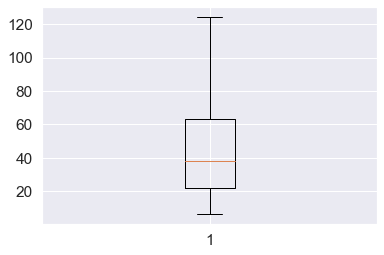

quantiles for i: density 
q1:  0.9956 
q3:  0.99782 
iqr:  0.0022199999999999998 
lower_fence:  0.99227 
upper_fence:  1.00115


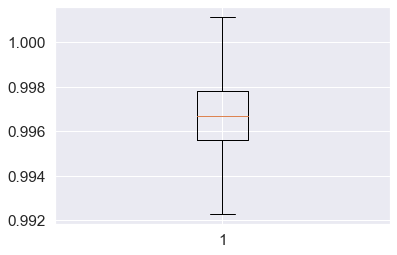

quantiles for i: pH 
q1:  3.21 
q3:  3.4 
iqr:  0.18999999999999995 
lower_fence:  2.925 
upper_fence:  3.6849999999999996


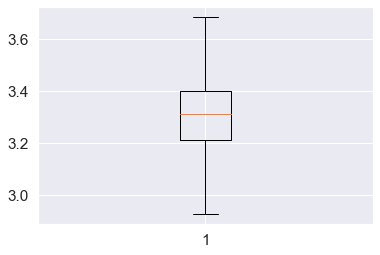

quantiles for i: sulphates 
q1:  0.55 
q3:  0.73 
iqr:  0.17999999999999994 
lower_fence:  0.28000000000000014 
upper_fence:  0.9999999999999999


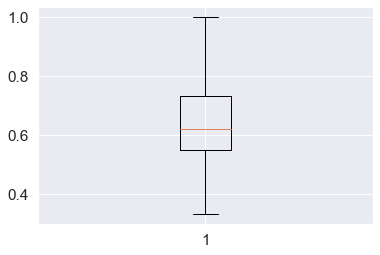

quantiles for i: alcohol 
q1:  9.5 
q3:  11.1 
iqr:  1.5999999999999996 
lower_fence:  7.1000000000000005 
upper_fence:  13.5


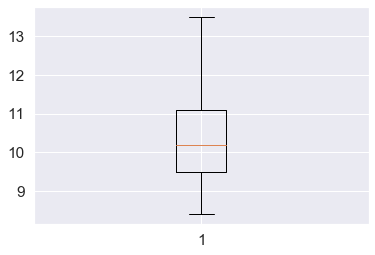

quantiles for i: quality 
q1:  5.0 
q3:  6.0 
iqr:  1.0 
lower_fence:  3.5 
upper_fence:  7.5


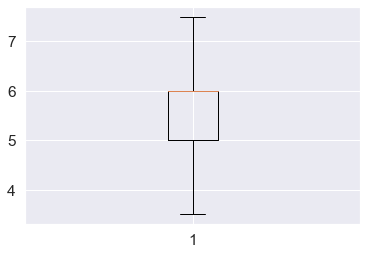

In [51]:
def outlier(df):
    for i in df.columns:
        if df[i].dtype!="O":
            q_1, q_3= np.percentile(df[i],[25,75])
            iqr = q_3 - q_1  #Inter Quartile Range
            LF = q_1 - (1.5 * iqr)
            UF = q_3 + (1.5 * iqr)
            print("quantiles for i:",i,'\nq1: ',q_1, '\nq3: ',q_3, '\niqr: ',iqr, '\nlower_fence: ',LF, '\nupper_fence: ',UF)
            df[i]=np.where(df[i]>UF,UF,df[i])
            df[i]=np.where(df[i]<LF,LF,df[i])
            plt.boxplot(df[i])
            plt.show()
            
        else:
            pass
        
outlier(data)

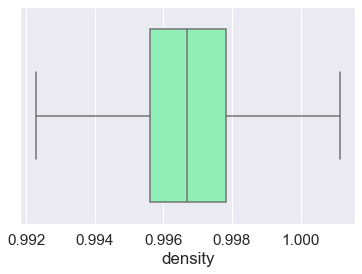

In [52]:
sns.boxplot(x = data['density'], data= data, palette='rainbow', orient='h', )
plt.show()

# sns.boxplot(x = data['density'], data= data, palette='rainbow', orient='h', )
# plt.show()

In [53]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.267421,0.672454,0.214733,0.218094,-0.142253,-0.109957,0.669601,-0.693462,0.224572,-0.071651,0.124298
volatile acidity,-0.267421,1.000000,-0.560157,0.038673,0.141735,-0.012927,0.088597,0.021525,0.248465,-0.311123,-0.205689,-0.393721
citric acid,0.672454,-0.560157,1.000000,0.179259,0.147204,-0.047500,0.030291,0.361570,-0.555134,0.345605,0.106349,0.229658
residual sugar,0.214733,0.038673,0.179259,1.000000,0.196879,0.080342,0.152674,0.409174,-0.097583,0.018561,0.109226,0.020125
chlorides,0.218094,0.141735,0.147204,0.196879,1.000000,-0.007580,0.107389,0.404969,-0.264409,0.127595,-0.306170,-0.191047
free sulfur dioxide,-0.142253,-0.012927,-0.047500,0.080342,-0.007580,1.000000,0.685832,-0.024608,0.059621,0.049309,-0.081324,-0.054451
total sulfur dioxide,-0.109957,0.088597,0.030291,0.152674,0.107389,0.685832,1.000000,0.103915,-0.066471,-0.005515,-0.244589,-0.203733
density,0.669601,0.021525,0.361570,0.409174,0.404969,-0.024608,0.103915,1.000000,-0.347814,0.157616,-0.508409,-0.183043
pH,-0.693462,0.248465,-0.555134,-0.097583,-0.264409,0.059621,-0.066471,-0.347814,1.000000,-0.154669,0.202165,-0.056892
sulphates,0.224572,-0.311123,0.345605,0.018561,0.127595,0.049309,-0.005515,0.157616,-0.154669,1.000000,0.157635,0.332457


In [54]:
# Classification
X = data.drop(['quality','grade'],1)
y = data['grade'] # Binary Classsification

'''
# # Regression
X1 =  data.drop(['quality','grade'],1)
y1= data['quality']  # 3 - 8 - Regression classification

'''

"\n# # Regression\nX1 =  data.drop(['quality','grade'],1)\ny1= data['quality']  # 3 - 8 - Regression classification\n\n"

In [55]:
# Classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [56]:
'''

# Regression
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=41)

'''

'\n\n# Regression\nX1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=41)\n\n'

In [57]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1044,6.4,0.390,0.33,3.30,0.046,12.0,53.0,0.99294,3.36,0.62,12.2
198,5.4,0.835,0.08,1.20,0.046,13.0,93.0,0.99240,3.57,0.85,13.0
1363,8.0,0.830,0.27,2.00,0.080,11.0,63.0,0.99652,3.29,0.48,9.8
80,6.2,0.450,0.20,1.60,0.069,3.0,15.0,0.99580,3.41,0.56,9.2
1574,5.6,0.310,0.78,3.65,0.074,23.0,92.0,0.99677,3.39,0.48,10.5


In [58]:
y_train.head()

1044    good
198     good
1363    poor
80      poor
1574    good
Name: grade, dtype: object

In [59]:
'''

# for regression proble -- Quality as Target
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state= 41)


'''

'\n\n# for regression proble -- Quality as Target\nX1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state= 41)\n\n\n'

In [60]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Random Forest Classifier using Grid Search CV

## GridSearch -  
Using GridSearch the training set is split into k smaller sets, A model is trained using K-1 of the folds as training data and the resulting model is validated on the remaining part of the data

In [1]:
# randomized Gridsearch cv = will not run all the combinations, will pic parameter values at random and train the model with them

# Grid Search CV helps to find best set of parameters by training the algorithm and seeing the results
clf = RandomForestClassifier() # defining Classifier

param_dist = {
             "n_estimators": [500,850,500,455,100,200,30,55,89],
             'max_depth': [2,5,10,50,25,30,40,],
             } #list of estimators i.e number of Tress to be Considered for Training

rf_gs = GridSearchCV(clf, param_grid=param_dist, cv = 6) # CV = 5 data will be split into train & test folds 5 times

rf_gs.fit(X_train, y_train) # Fitting Gridsearch to Trainig Data

In [ ]:
print(rf_gs.best_score_)
# evaluated on a particular fold out of the 5-fold split that you gave for CV

In [ ]:
print(rf_gs.best_params_)
 # Parameter that gave the best results.

In [ ]:
rf_gs.classes_

In [ ]:
X_test.head()

In [ ]:
rf_gs.predict(X_test)[:5]

In [ ]:
pred_rfc = rf_gs.predict(X_test)

print(metrics.classification_report(y_test, pred_rfc))
print("The RF model accuracy on Test data is %s" %metrics.accuracy_score(y_test, pred_rfc))

# Random Forest without Gridsearch CV

In [62]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

In [63]:
rf_c = RandomForestClassifier(n_estimators=50, max_depth=15, random_state = 47, min_samples_leaf = 10) 

rf_c.fit(X_train,y_train)

y_predict = rf_c.predict(X_test)

print("Binary Random Forest Classifier Acuracy",metrics.accuracy_score(y_predict,y_test),'\n')
print(metrics.classification_report(y_test, y_predict))

Binary Random Forest Classifier Acuracy 0.7389705882352942 

              precision    recall  f1-score   support

        good       0.78      0.73      0.75       150
        poor       0.69      0.75      0.72       122

    accuracy                           0.74       272
   macro avg       0.74      0.74      0.74       272
weighted avg       0.74      0.74      0.74       272



In [ ]:
rf_c.feature_importances_

In [ ]:
# Finding Importamt features
pd.DataFrame(rf_c.feature_importances_,
             index = X_train.columns, 
             columns = ['importance']).sort_values(by = 'importance', ascending = False)

In [ ]:
'''
# For Multiclass Classification
rf_c_1 = RandomForestRegressor() 

rf_c_1.fit(X1_train,y1_train)

y_predict_1 = rf_c_1.predict(X1_test)

'''

In [ ]:
'''y_predict_1'''

In [ ]:
'''
print('MAE: ',mean_absolute_error(y1_test, y_predict_1))

print('MSE: ', mean_squared_error(y1_test, y_predict_1))

print('RMSE: ',np.sqrt(mean_squared_error(y1_test, y_predict_1)))

print('R2: ',r2_score(y1_test, y_predict_1)*100)


'''

In [65]:
rf_c.estimators_[49] # 0-49 DT used by RF_C

DecisionTreeClassifier(max_depth=15, max_features='auto', min_samples_leaf=10,
                       random_state=1113659413)

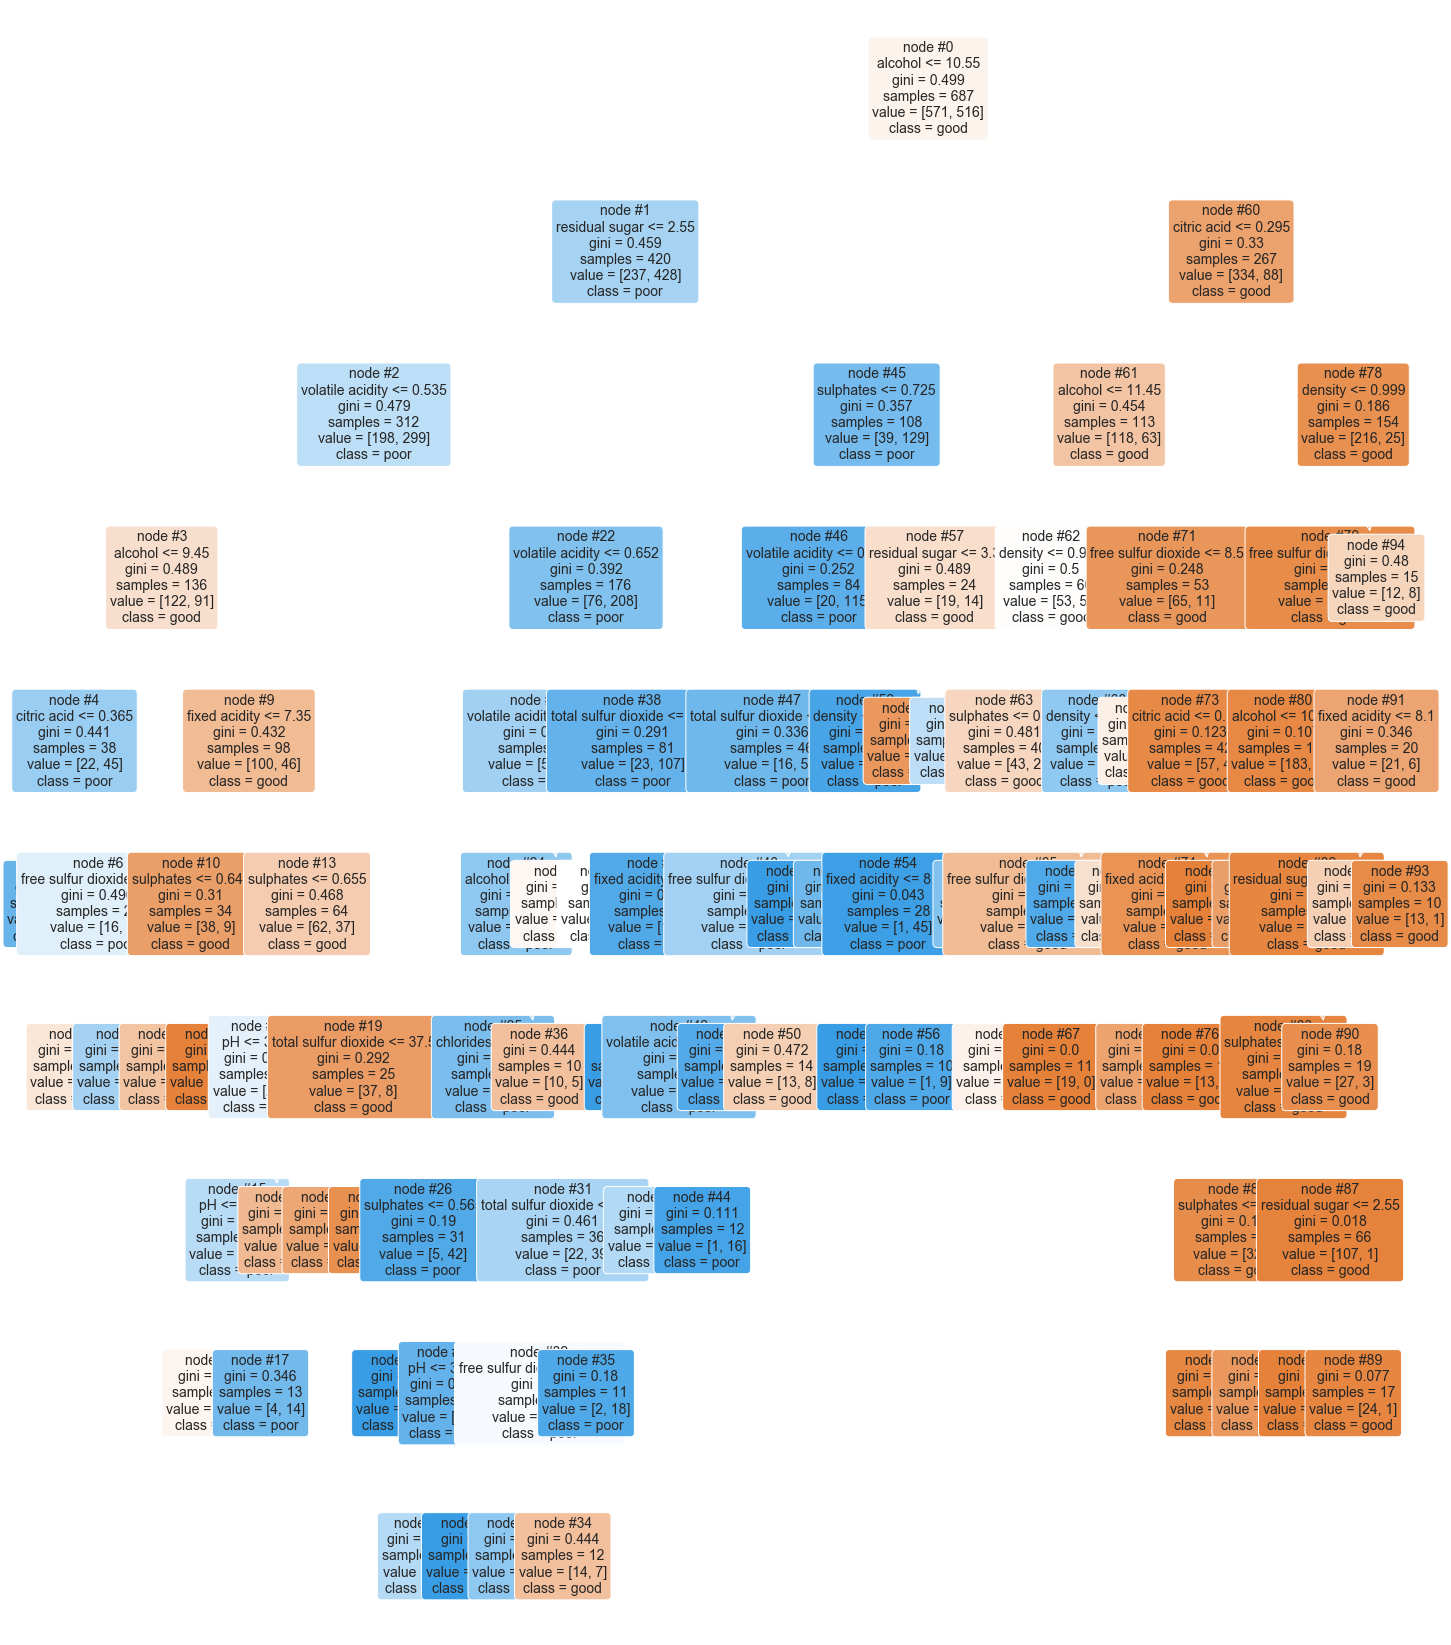

In [69]:
from sklearn.tree import plot_tree

plt.figure(figsize = (25,30))
a = plot_tree(rf_c.estimators_[10],
                 feature_names = X_train.columns,
                 class_names = rf_c.classes_ ,
                 filled = True,
                 rounded = True,
                 fontsize = 14,
                 node_ids = True
                 )

# Decision Tree

In [ ]:
# For Binary
dt_c = DecisionTreeClassifier()

dt_c.fit(X_train,y_train)

y_predict = dt_c.predict(X_test)

# print(dt_c.fit(X_train,y_train).tree_.node_count)

In [ ]:
print("Binary Output DecisionTreeClassifier",metrics.accuracy_score(y_predict,y_test),'\n')
print(metrics.classification_report(y_test, y_predict))

In [ ]:
from sklearn.tree import plot_tree 

plt.figure(figsize = (25,30))

a = plot_tree(dt_c,
             feature_names = X_train.columns,
             class_names = dt_c.classes_ ,
             filled = True,
             rounded = True,
             fontsize = 14,
             node_ids = True,
             )


# GINNI VALUE TELL THE PROBABILITY OF A CLASS BEING WRONGLY CLASSIIFIED 
# 1- GINNI VALUE  --> WILL GIVE  PROBABILITY OF A CLASS BEING CORRECTLY CLASSIIFIED 

In [ ]:
'''

dt_r = DecisionTreeRegressor()

dt_r.fit(X1_train,y1_train)

y_predict_2 = dt_r.predict(X1_test)

print('MAE: ',mean_absolute_error(y1_test, y_predict_2))

print('MSE: ', mean_squared_error(y1_test, y_predict_2))

print('RMSE: ',np.sqrt(mean_squared_error(y1_test, y_predict_2)))

print('R2: ',r2_score(y1_test, y_predict_2)*100)

'''